In [1]:
import pandas as pd
import talib
import pynance as pn
import yfinance as yf
import pandas_ta as ta
from IPython.display import display
import os

In [2]:
import sys
sys.path.append('../scripts')

In [3]:
from quantitative import load_stock_data, add_technical_indicators, add_trading_signals, calculate_financial_metrics, backtest_signals, print_statistical_summary, plot_price_with_indicators



In [4]:
stocks = {
    'AAPL': '../data/yfinance_data/AAPL_historical_data.csv',
    'AMZN': '../data/yfinance_data/AMZN_historical_data.csv',
    'GOOG': '../data/yfinance_data/GOOG_historical_data.csv',
    'META': '../data/yfinance_data/META_historical_data.csv',
    'MSFT': '../data/yfinance_data/MSFT_historical_data.csv',
    'NVDA': '../data/yfinance_data/NVDA_historical_data.csv',
    'TSLA': '../data/yfinance_data/TSLA_historical_data.csv'
}
stock_dfs = {}

In [5]:
def apply_analysis_step(func, stock_dfs, func_name, columns=None, drop_na=False, **kwargs):
    print(f"\n{func_name}...")
    for ticker, df in stock_dfs.items():
        print(f"Processing {ticker}...")
        stock_dfs[ticker] = func(df, **kwargs)
        if columns:
            display_df = stock_dfs[ticker][columns]
            if drop_na:
                display_df = display_df.dropna(subset=columns)
            if not display_df.empty:
                display(display_df.head())
            else:
                print(f"No valid data to display for {ticker} after dropping NaN.")
    return stock_dfs

In [6]:
print("Loading and filtering data (post-2018 for relevance)...")
for ticker, filepath in stocks.items():
    print(f"Loading {ticker}...")
    df = load_stock_data(filepath=filepath)
    if df is not None:
        # Filter for recent data to reduce NaN and align with news
        df = df[df.index >= '2023-01-01']  # Adjusted to 2023 for recent trends
        if len(df) < 50:
            print(f"Warning: {ticker} has insufficient data ({len(df)} rows)")
            continue
        stock_dfs[ticker] = df
        display(df[['Close', 'Open', 'High', 'Low', 'Volume']].head())
    else:
        print(f"Failed to load data for {ticker}")

Loading and filtering data (post-2018 for relevance)...
Loading AAPL...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,125.070000,130.279999,130.899994,124.169998,112117500
2023-01-04,126.360001,126.889999,128.660004,125.080002,89113600
2023-01-05,125.019997,127.129997,127.769997,124.760002,80962700
2023-01-06,129.619995,126.010002,130.289993,124.889999,87754700
2023-01-09,130.149994,130.470001,133.410004,129.889999,70790800


Loading AMZN...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,85.820000,85.459999,86.959999,84.209999,76706000
2023-01-04,85.139999,86.550003,86.980003,83.360001,68885100
2023-01-05,83.120003,85.330002,85.419998,83.070000,67930800
2023-01-06,86.080002,83.029999,86.400002,81.430000,83303400
2023-01-09,87.360001,87.459999,89.480003,87.080002,65266100


Loading GOOG...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,89.699997,89.830002,91.550003,89.019997,20738500
2023-01-04,88.709999,91.010002,91.239998,87.800003,27046500
2023-01-05,86.769997,88.070000,88.209999,86.559998,23136100
2023-01-06,88.160004,87.360001,88.470001,85.570000,26612600
2023-01-09,88.800003,89.195000,90.830002,88.580002,22996700


Loading META...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,124.739998,122.820000,126.370003,122.279999,35528500
2023-01-04,127.370003,127.379997,129.050003,125.849998,32397100
2023-01-05,126.940002,126.129997,128.520004,124.540001,25447100
2023-01-06,130.020004,128.970001,130.330002,126.040001,27584500
2023-01-09,129.470001,131.160004,132.949997,129.279999,26649100


Loading MSFT...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,239.580002,243.080002,245.750000,237.399994,25740000
2023-01-04,229.100006,232.279999,232.869995,225.960007,50623400
2023-01-05,222.309998,227.199997,227.550003,221.759995,39585600
2023-01-06,224.929993,223.000000,225.759995,219.350006,43613600
2023-01-09,227.119995,226.449997,231.240005,226.410004,27369800


Loading NVDA...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,14.315,14.851,14.996,14.096,401277000
2023-01-04,14.749,14.567,14.853,14.241,431324000
2023-01-05,14.265,14.491,14.564,14.148,389168000
2023-01-06,14.859,14.474,15.010,14.034,405044000
2023-01-09,15.628,15.284,16.056,15.141,504231000


Loading TSLA...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,108.099998,118.470001,118.800003,104.639999,231402800
2023-01-04,113.639999,109.110001,114.589996,107.519997,180389000
2023-01-05,110.339996,110.510002,111.750000,107.160004,157986300
2023-01-06,113.059998,103.000000,114.389999,101.809998,220911100
2023-01-09,119.769997,118.959999,123.519997,117.110001,190284000


In [7]:
print("Loading and filtering data (2023–2024)...")
for ticker, filepath in stocks.items():
    print(f"Loading {ticker}...")
    df = load_stock_data(filepath=filepath)
    if df is not None:
        # Filter for 2023–2024 to align with news data
        df = df[df.index >= '2023-01-01']
        if len(df) < 50:
            print(f"Warning: {ticker} has insufficient data ({len(df)} rows)")
            continue
        stock_dfs[ticker] = df
        display(df[['Close', 'Open', 'High', 'Low', 'Volume']].head())
    else:
        print(f"Failed to load data for {ticker}")

Loading and filtering data (2023–2024)...
Loading AAPL...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,125.070000,130.279999,130.899994,124.169998,112117500
2023-01-04,126.360001,126.889999,128.660004,125.080002,89113600
2023-01-05,125.019997,127.129997,127.769997,124.760002,80962700
2023-01-06,129.619995,126.010002,130.289993,124.889999,87754700
2023-01-09,130.149994,130.470001,133.410004,129.889999,70790800


Loading AMZN...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,85.820000,85.459999,86.959999,84.209999,76706000
2023-01-04,85.139999,86.550003,86.980003,83.360001,68885100
2023-01-05,83.120003,85.330002,85.419998,83.070000,67930800
2023-01-06,86.080002,83.029999,86.400002,81.430000,83303400
2023-01-09,87.360001,87.459999,89.480003,87.080002,65266100


Loading GOOG...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,89.699997,89.830002,91.550003,89.019997,20738500
2023-01-04,88.709999,91.010002,91.239998,87.800003,27046500
2023-01-05,86.769997,88.070000,88.209999,86.559998,23136100
2023-01-06,88.160004,87.360001,88.470001,85.570000,26612600
2023-01-09,88.800003,89.195000,90.830002,88.580002,22996700


Loading META...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,124.739998,122.820000,126.370003,122.279999,35528500
2023-01-04,127.370003,127.379997,129.050003,125.849998,32397100
2023-01-05,126.940002,126.129997,128.520004,124.540001,25447100
2023-01-06,130.020004,128.970001,130.330002,126.040001,27584500
2023-01-09,129.470001,131.160004,132.949997,129.279999,26649100


Loading MSFT...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,239.580002,243.080002,245.750000,237.399994,25740000
2023-01-04,229.100006,232.279999,232.869995,225.960007,50623400
2023-01-05,222.309998,227.199997,227.550003,221.759995,39585600
2023-01-06,224.929993,223.000000,225.759995,219.350006,43613600
2023-01-09,227.119995,226.449997,231.240005,226.410004,27369800


Loading NVDA...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,14.315,14.851,14.996,14.096,401277000
2023-01-04,14.749,14.567,14.853,14.241,431324000
2023-01-05,14.265,14.491,14.564,14.148,389168000
2023-01-06,14.859,14.474,15.010,14.034,405044000
2023-01-09,15.628,15.284,16.056,15.141,504231000


Loading TSLA...


,Close,Open,High,Low,Volume
Date,,,,,
2023-01-03,108.099998,118.470001,118.800003,104.639999,231402800
2023-01-04,113.639999,109.110001,114.589996,107.519997,180389000
2023-01-05,110.339996,110.510002,111.750000,107.160004,157986300
2023-01-06,113.059998,103.000000,114.389999,101.809998,220911100
2023-01-09,119.769997,118.959999,123.519997,117.110001,190284000


In [8]:
stock_dfs = apply_analysis_step(
    add_technical_indicators,
    stock_dfs,
    "Adding technical indicators",
    columns=['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'BB_upper'],
    drop_na=True
)


Adding technical indicators...
Processing AAPL...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,152.990005,150.305501,144.7934,58.933103,2.013153,155.895566
2023-03-16,155.850006,150.331501,145.4090,63.251906,2.261574,156.018795
2023-03-17,155.000000,150.396001,145.9818,61.192187,2.362626,156.261560
2023-03-20,157.399994,150.638500,146.6294,64.688595,2.606326,157.199963
2023-03-21,159.279999,151.178500,147.2226,67.182832,2.917530,158.654440


Processing AMZN...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,96.199997,94.5550,95.9290,53.898922,-0.633126,99.235661
2023-03-16,100.040001,94.4990,96.2134,61.225283,-0.112257,98.879397
2023-03-17,98.949997,94.5390,96.4896,58.388752,0.210158,99.064239
2023-03-20,97.709999,94.5645,96.7814,55.252669,0.361450,99.154712
2023-03-21,100.610001,94.8660,97.0720,60.584619,0.707204,100.159015


Processing GOOG...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,96.550003,92.975500,94.941201,56.155077,-0.146373,97.462037
2023-03-16,101.070000,93.174001,95.168601,63.765049,0.459957,98.621320
2023-03-17,102.459999,93.508001,95.443601,65.734657,1.040643,100.224754
2023-03-20,101.930000,93.875001,95.746801,64.299483,1.441458,101.525353
2023-03-21,105.839996,94.564500,96.100401,69.576677,2.050969,103.761910


Processing META...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,197.750000,178.701999,162.390799,73.496689,8.151781,194.193205
2023-03-16,204.929993,180.090498,163.994599,77.058246,9.208692,199.309544
2023-03-17,195.610001,181.248998,165.359399,64.871921,9.188338,201.260700
2023-03-20,197.809998,182.495498,166.776799,66.229552,9.243179,203.354512
2023-03-21,202.160004,183.999498,168.219599,68.797406,9.527820,205.946991


Processing MSFT...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,265.440002,254.786500,249.566400,61.144715,2.215943,266.271816
2023-03-16,276.200012,255.130500,250.298801,68.199836,3.665669,268.580492
2023-03-17,279.429993,255.994500,251.305400,69.962962,5.017382,272.910608
2023-03-20,272.230011,256.703001,252.303801,61.744869,5.444881,275.033629
2023-03-21,273.779999,257.758501,253.280801,62.759026,5.841411,277.421343


Processing NVDA...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,24.228001,22.99065,20.45718,62.777335,1.001864,25.020888
2023-03-16,25.541000,23.12950,20.68170,68.349950,1.097727,25.439334
2023-03-17,25.725000,23.31565,20.90122,69.049245,1.175001,25.823597
2023-03-20,25.900000,23.54125,21.13392,69.734169,1.236114,26.125592
2023-03-21,26.198999,23.81845,21.36072,70.918326,1.293759,26.291930


Processing TSLA...


,Close,SMA_20,SMA_50,RSI,MACD,BB_upper
Date,,,,,,
2023-03-15,180.449997,193.732000,170.3836,47.867344,1.630880,218.079173
2023-03-16,184.130005,192.226500,171.9042,50.366366,1.446184,214.987051
2023-03-17,180.130005,191.131001,173.2340,47.690362,0.965910,214.005579
2023-03-20,183.250000,189.878001,174.6922,49.925189,0.827508,211.565895
2023-03-21,197.580002,189.888501,176.3826,58.660935,1.852777,211.591092


In [9]:
stock_dfs = apply_analysis_step(
    add_trading_signals,
    stock_dfs,
    "Adding trading signals",
    columns=['Close', 'Signal']
)


Adding trading signals...
Processing AAPL...


,Close,Signal
Date,,
2023-01-03,125.070000,0
2023-01-04,126.360001,0
2023-01-05,125.019997,0
2023-01-06,129.619995,0
2023-01-09,130.149994,0


Processing AMZN...


,Close,Signal
Date,,
2023-01-03,85.820000,0
2023-01-04,85.139999,0
2023-01-05,83.120003,0
2023-01-06,86.080002,0
2023-01-09,87.360001,0


Processing GOOG...


,Close,Signal
Date,,
2023-01-03,89.699997,0
2023-01-04,88.709999,0
2023-01-05,86.769997,0
2023-01-06,88.160004,0
2023-01-09,88.800003,0


Processing META...


,Close,Signal
Date,,
2023-01-03,124.739998,0
2023-01-04,127.370003,0
2023-01-05,126.940002,0
2023-01-06,130.020004,0
2023-01-09,129.470001,0


Processing MSFT...


,Close,Signal
Date,,
2023-01-03,239.580002,0
2023-01-04,229.100006,0
2023-01-05,222.309998,0
2023-01-06,224.929993,0
2023-01-09,227.119995,0


Processing NVDA...


,Close,Signal
Date,,
2023-01-03,14.315,0
2023-01-04,14.749,0
2023-01-05,14.265,0
2023-01-06,14.859,0
2023-01-09,15.628,0


Processing TSLA...


,Close,Signal
Date,,
2023-01-03,108.099998,0
2023-01-04,113.639999,0
2023-01-05,110.339996,0
2023-01-06,113.059998,0
2023-01-09,119.769997,0


In [10]:
stock_dfs = apply_analysis_step(
    add_trading_signals,
    stock_dfs,
    "Adding trading signals",
    columns=['Close', 'Signal']
)


Adding trading signals...
Processing AAPL...


,Close,Signal
Date,,
2023-01-03,125.070000,0
2023-01-04,126.360001,0
2023-01-05,125.019997,0
2023-01-06,129.619995,0
2023-01-09,130.149994,0


Processing AMZN...


,Close,Signal
Date,,
2023-01-03,85.820000,0
2023-01-04,85.139999,0
2023-01-05,83.120003,0
2023-01-06,86.080002,0
2023-01-09,87.360001,0


Processing GOOG...


,Close,Signal
Date,,
2023-01-03,89.699997,0
2023-01-04,88.709999,0
2023-01-05,86.769997,0
2023-01-06,88.160004,0
2023-01-09,88.800003,0


Processing META...


,Close,Signal
Date,,
2023-01-03,124.739998,0
2023-01-04,127.370003,0
2023-01-05,126.940002,0
2023-01-06,130.020004,0
2023-01-09,129.470001,0


Processing MSFT...


,Close,Signal
Date,,
2023-01-03,239.580002,0
2023-01-04,229.100006,0
2023-01-05,222.309998,0
2023-01-06,224.929993,0
2023-01-09,227.119995,0


Processing NVDA...


,Close,Signal
Date,,
2023-01-03,14.315,0
2023-01-04,14.749,0
2023-01-05,14.265,0
2023-01-06,14.859,0
2023-01-09,15.628,0


Processing TSLA...


,Close,Signal
Date,,
2023-01-03,108.099998,0
2023-01-04,113.639999,0
2023-01-05,110.339996,0
2023-01-06,113.059998,0
2023-01-09,119.769997,0


In [11]:
stock_dfs = apply_analysis_step(
    calculate_financial_metrics,
    stock_dfs,
    "Calculating financial metrics",
    columns=['Close', 'Daily_Return', 'Volatility', 'Sharpe_Ratio']
)


Calculating financial metrics...
Processing AAPL...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,125.070000,NaN,NaN,NaN
2023-01-04,126.360001,0.010314,NaN,NaN
2023-01-05,125.019997,-0.010605,NaN,NaN
2023-01-06,129.619995,0.036794,NaN,NaN
2023-01-09,130.149994,0.004089,NaN,NaN


Processing AMZN...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,85.820000,NaN,NaN,NaN
2023-01-04,85.139999,-0.007924,NaN,NaN
2023-01-05,83.120003,-0.023726,NaN,NaN
2023-01-06,86.080002,0.035611,NaN,NaN
2023-01-09,87.360001,0.014870,NaN,NaN


Processing GOOG...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,89.699997,NaN,NaN,NaN
2023-01-04,88.709999,-0.011037,NaN,NaN
2023-01-05,86.769997,-0.021869,NaN,NaN
2023-01-06,88.160004,0.016019,NaN,NaN
2023-01-09,88.800003,0.007260,NaN,NaN


Processing META...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,124.739998,NaN,NaN,NaN
2023-01-04,127.370003,0.021084,NaN,NaN
2023-01-05,126.940002,-0.003376,NaN,NaN
2023-01-06,130.020004,0.024263,NaN,NaN
2023-01-09,129.470001,-0.004230,NaN,NaN


Processing MSFT...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,239.580002,NaN,NaN,NaN
2023-01-04,229.100006,-0.043743,NaN,NaN
2023-01-05,222.309998,-0.029638,NaN,NaN
2023-01-06,224.929993,0.011785,NaN,NaN
2023-01-09,227.119995,0.009736,NaN,NaN


Processing NVDA...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,14.315,NaN,NaN,NaN
2023-01-04,14.749,0.030318,NaN,NaN
2023-01-05,14.265,-0.032816,NaN,NaN
2023-01-06,14.859,0.041640,NaN,NaN
2023-01-09,15.628,0.051753,NaN,NaN


Processing TSLA...


,Close,Daily_Return,Volatility,Sharpe_Ratio
Date,,,,
2023-01-03,108.099998,NaN,NaN,NaN
2023-01-04,113.639999,0.051249,NaN,NaN
2023-01-05,110.339996,-0.029039,NaN,NaN
2023-01-06,113.059998,0.024651,NaN,NaN
2023-01-09,119.769997,0.059349,NaN,NaN


Why NaN Values Appear in Technical Indicators

The NaN values in the initial rows of technical indicators (e.g., SMA_20, SMA_50, RSI, MACD, BB_upper) are not an error but a normal behavior of TA-Lib. Indicators require lookback periods (e.g., 50 days for SMA_50, 20 for SMA_20) to compute, so early rows (e.g., AAPL’s 1980-12-12) lack sufficient data, resulting in NaN. With ample data (e.g., AAPL: 10,998 rows), valid values appear after the lookback period. Filtering to recent data (2023–2024) and using dropna() ensures meaningful outputs for analysis and Task 3 correlation.


Visualizing indicators...
Plotting AAPL...


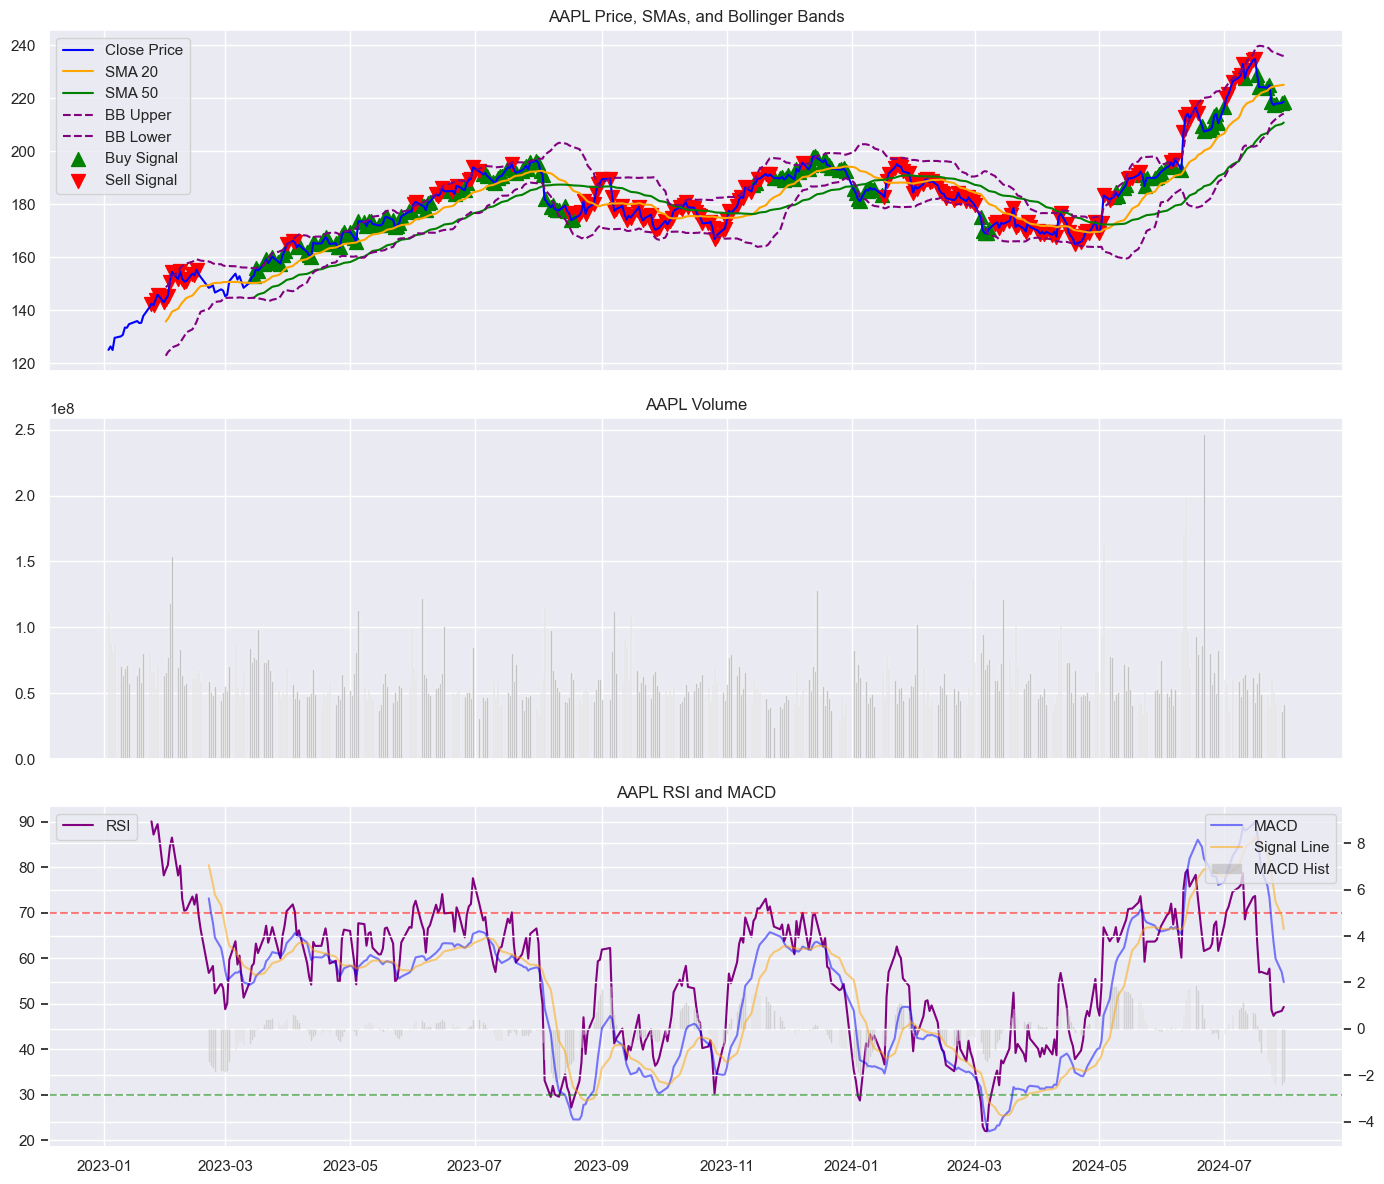

Plotting AMZN...


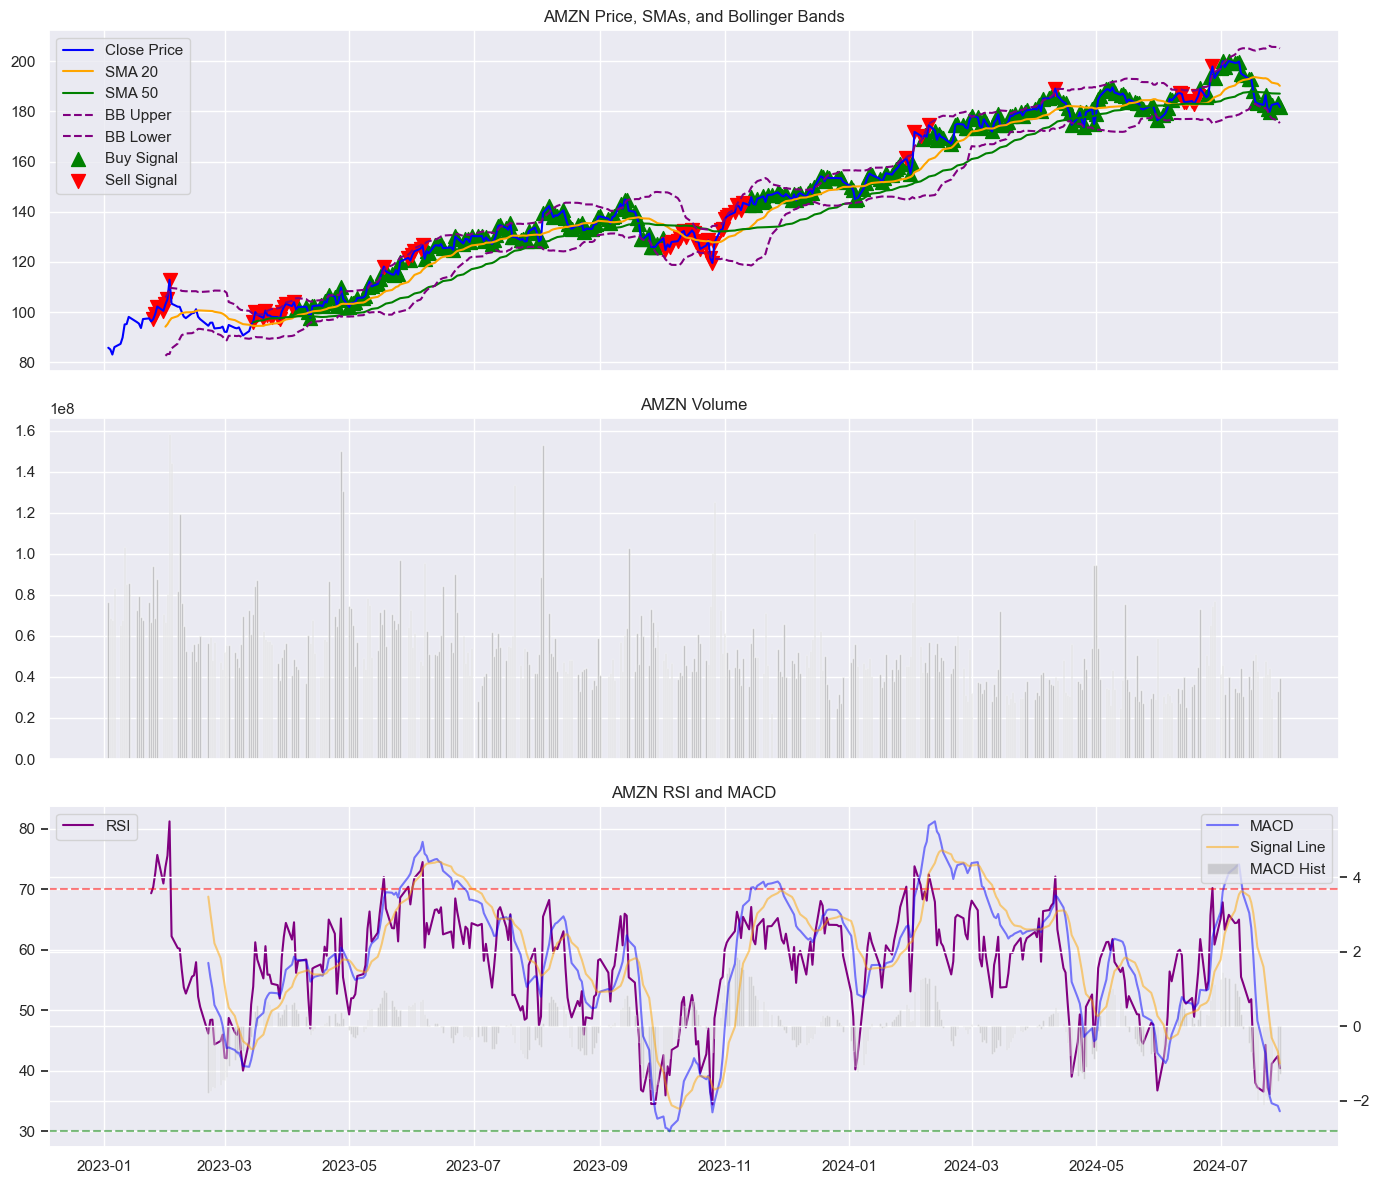

Plotting GOOG...


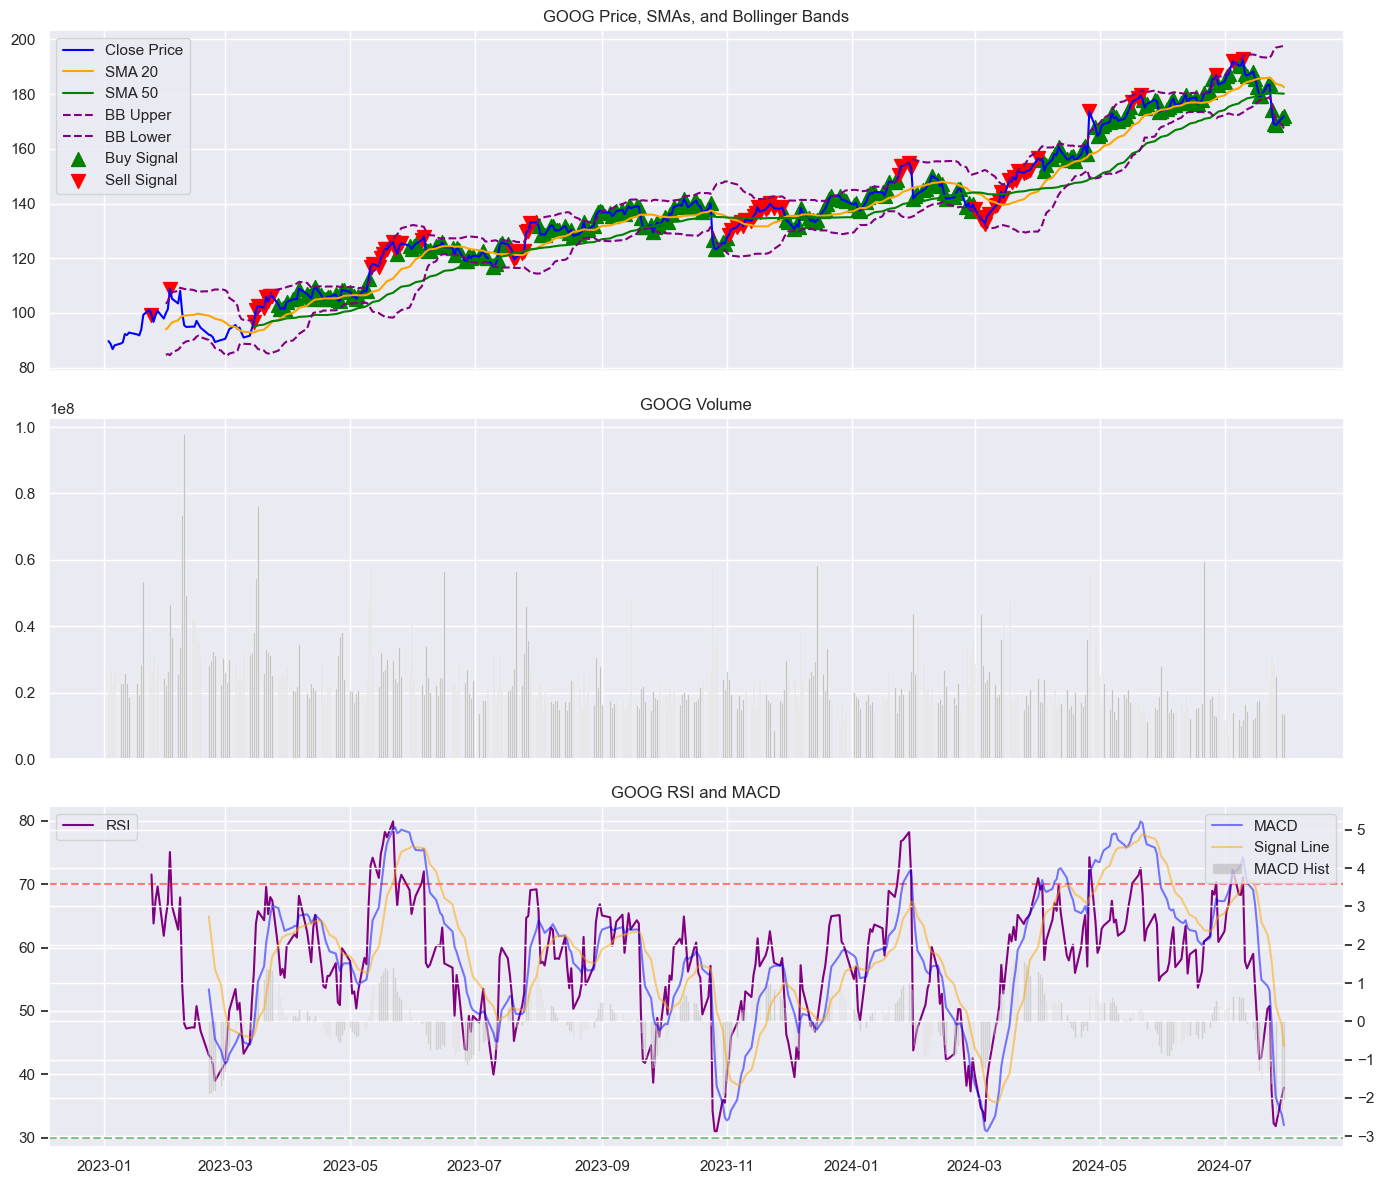

Plotting META...


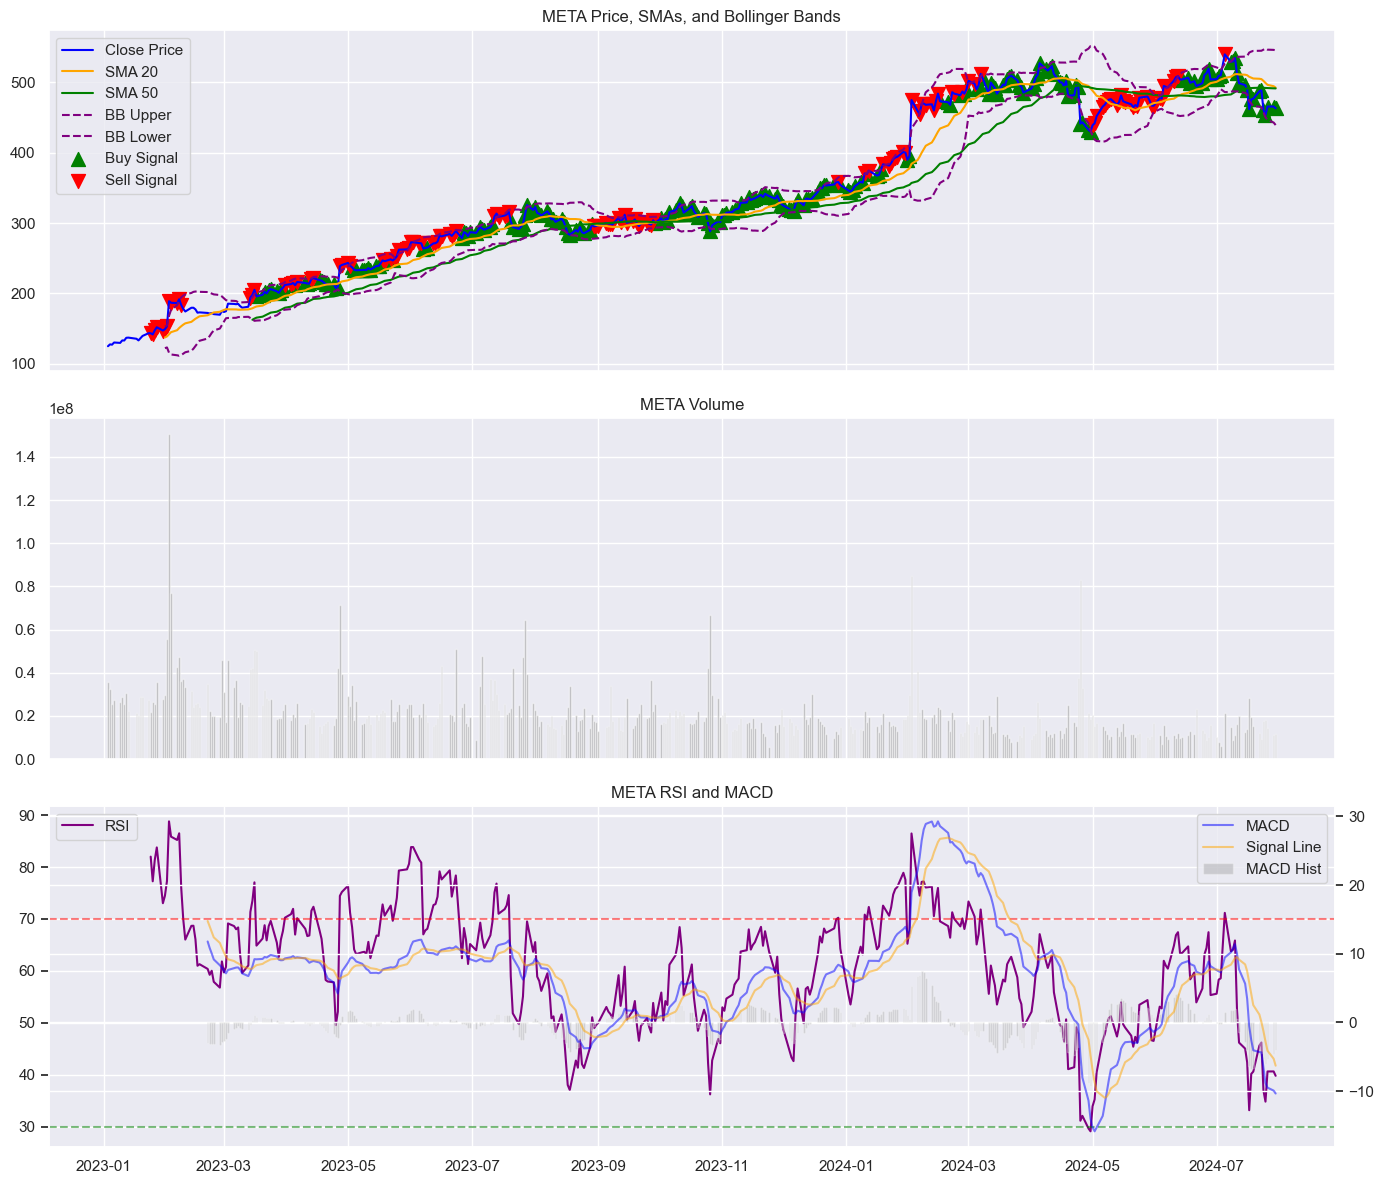

Plotting MSFT...


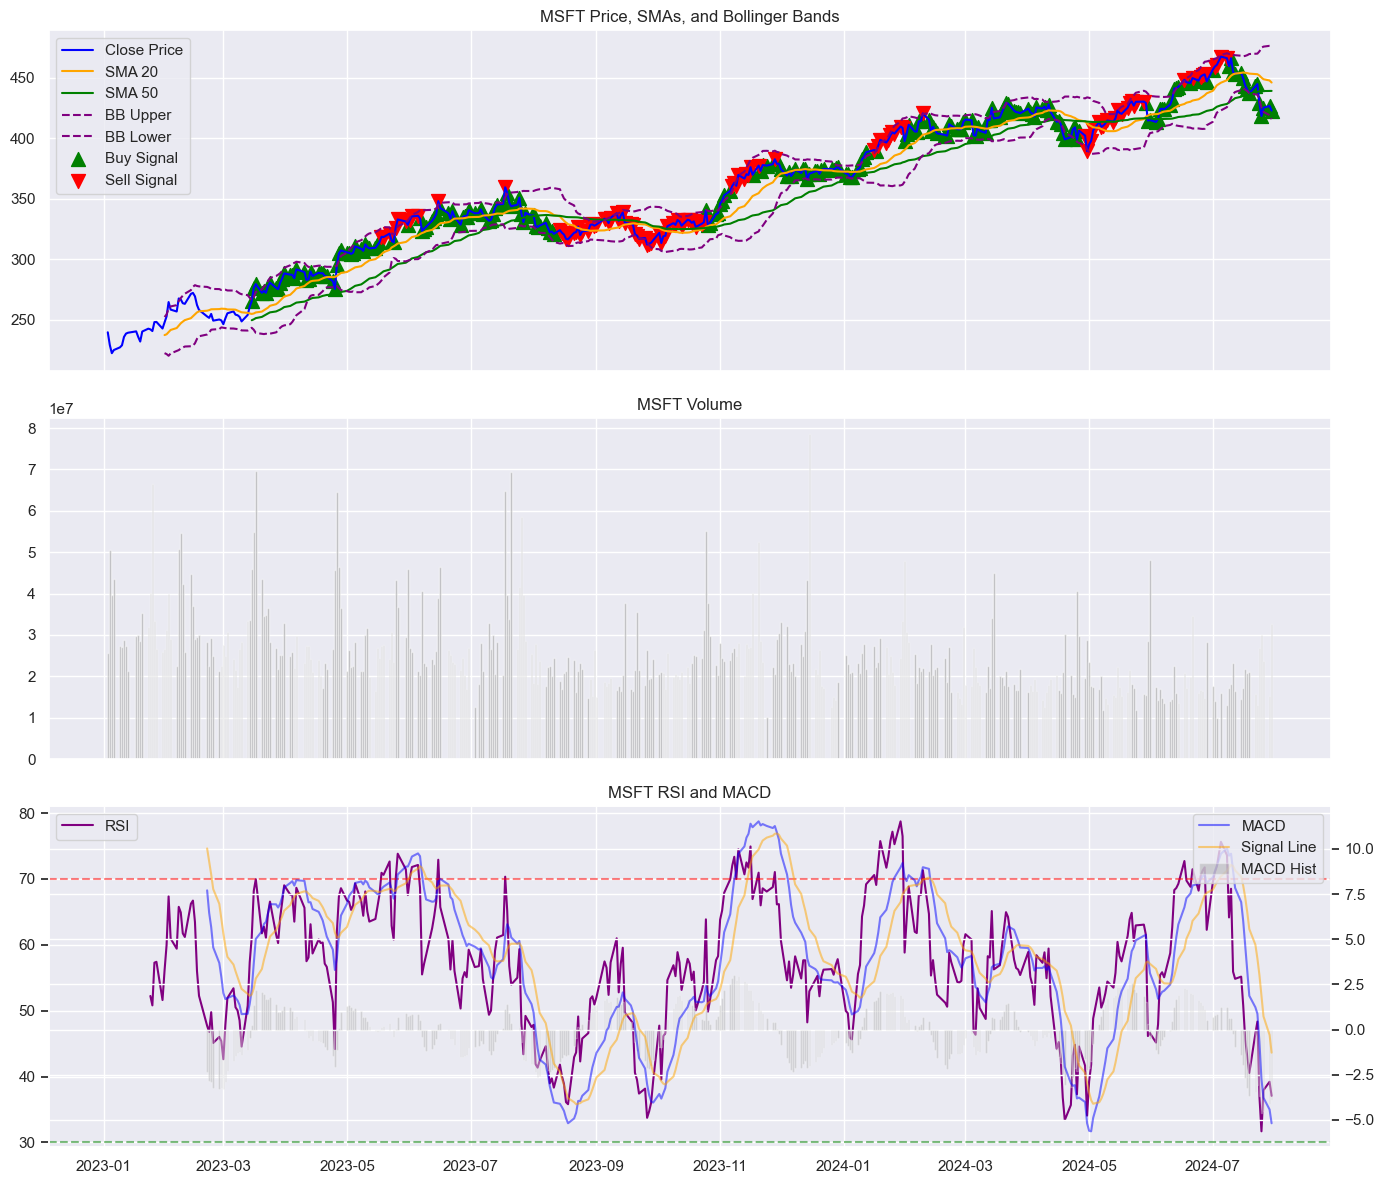

Plotting NVDA...


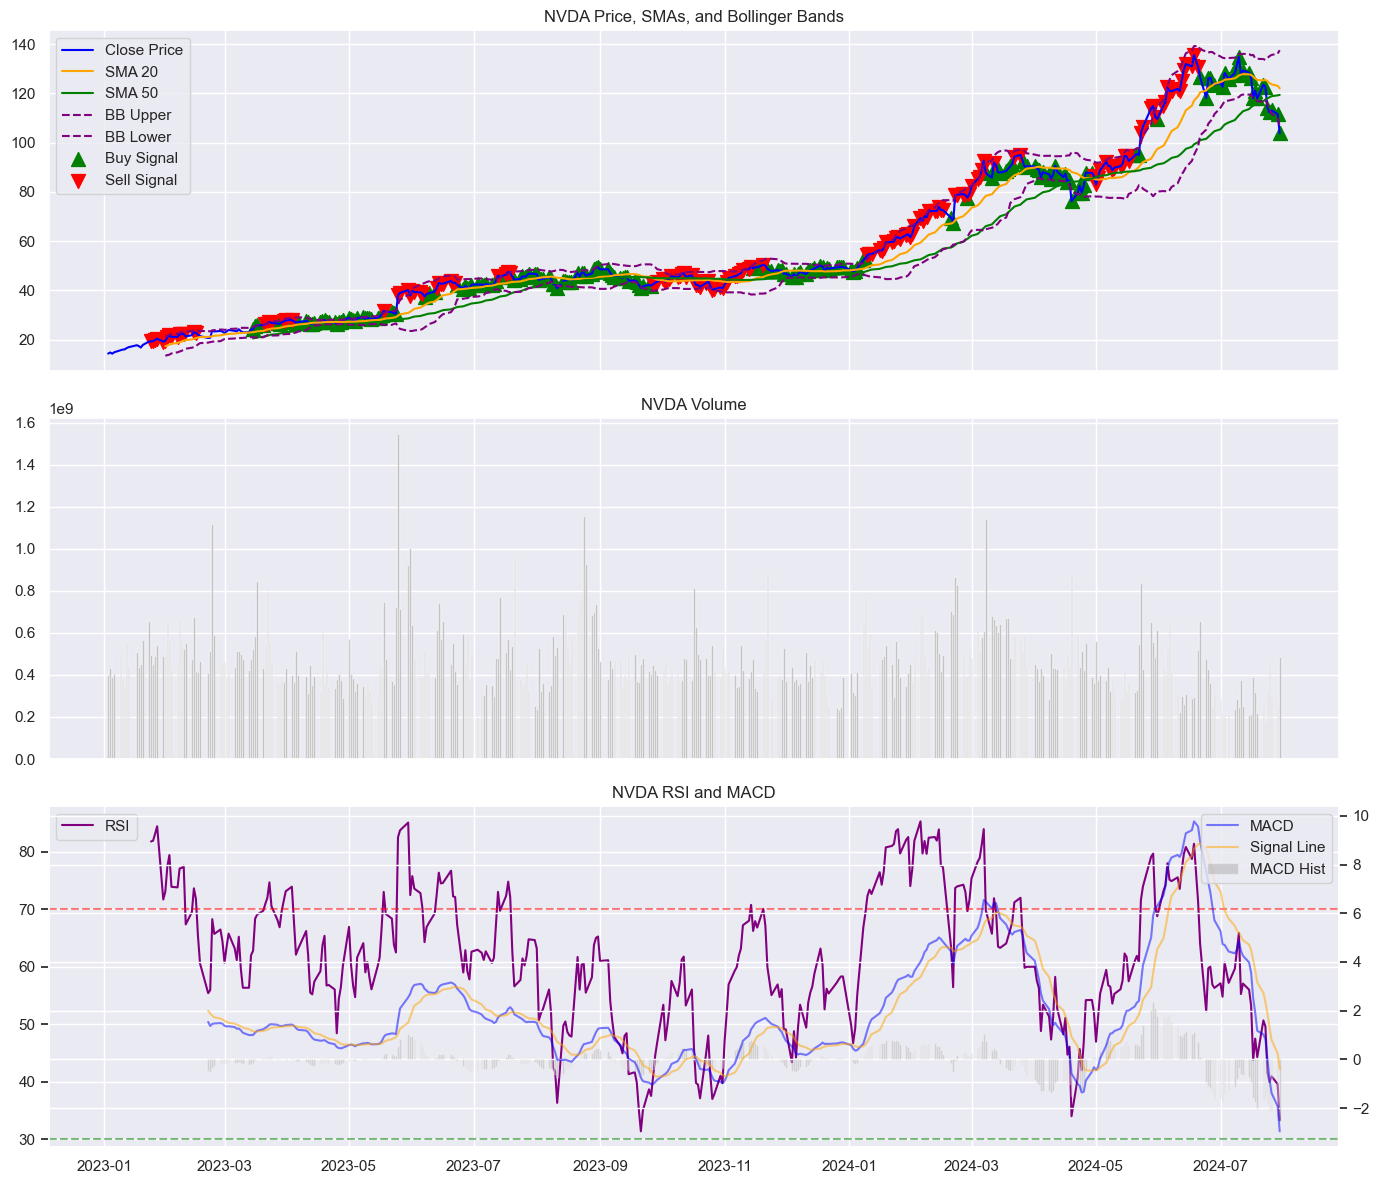

Plotting TSLA...


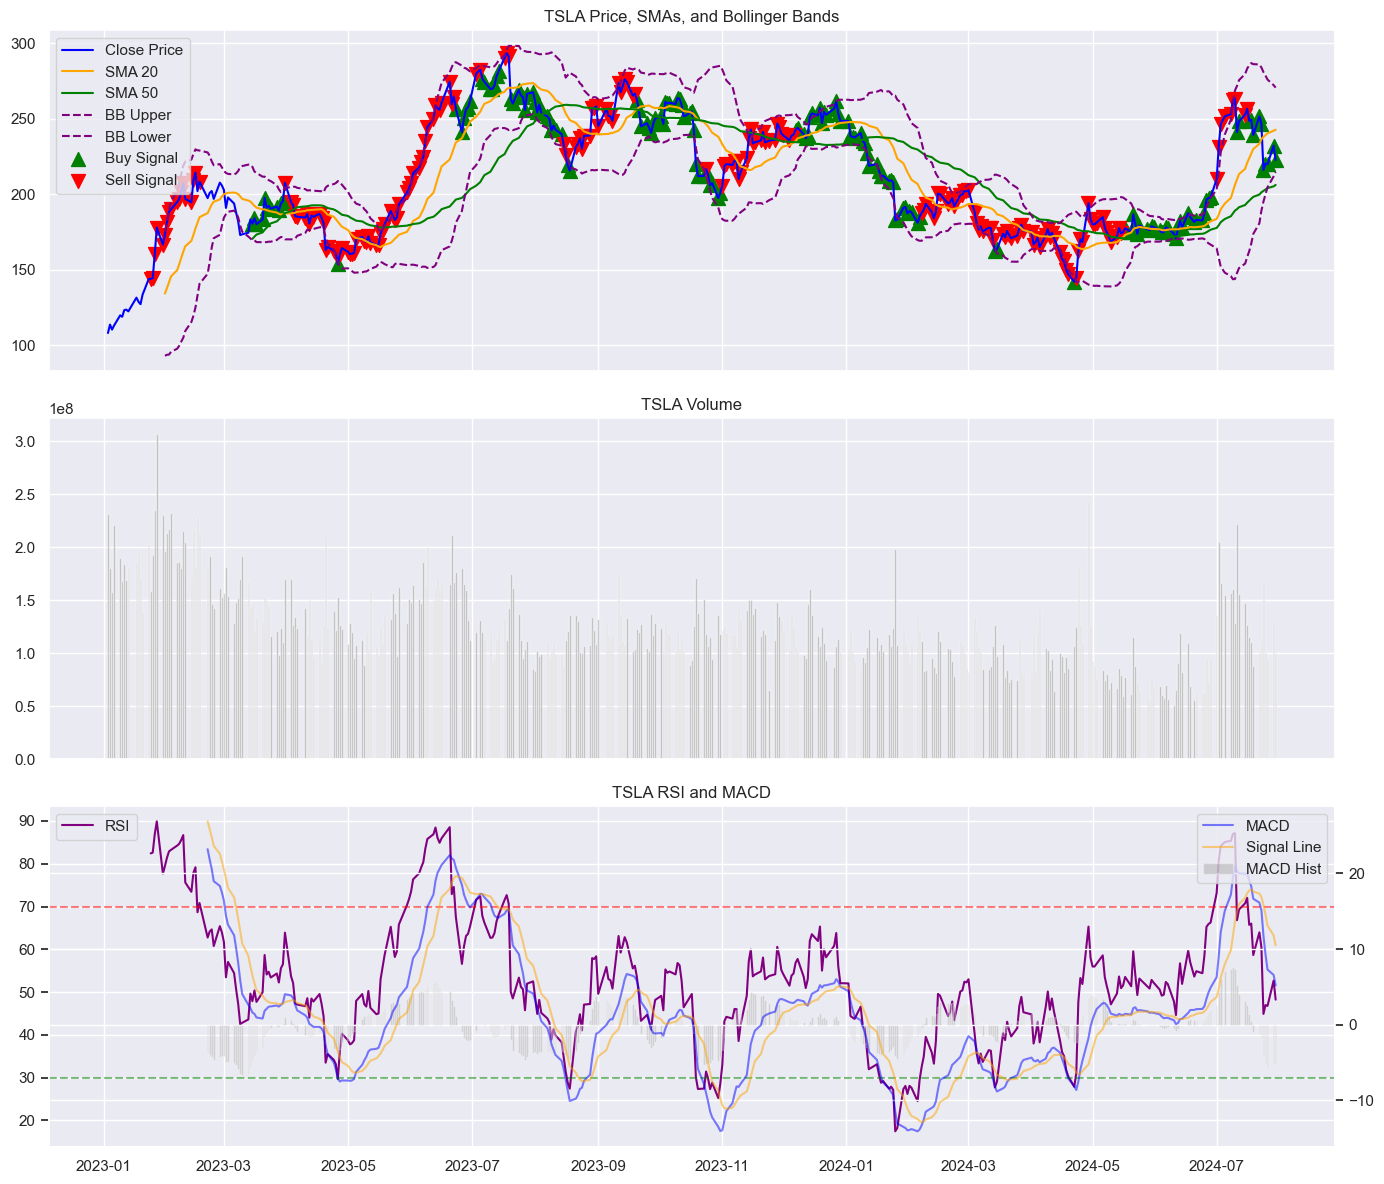

In [18]:
print("\nVisualizing indicators...")
plot_count = 0
max_plots = 10  # Per challenge requirement
for ticker, df in stock_dfs.items():
    if plot_count >= max_plots:
        print("Reached maximum plot limit (10). Skipping remaining plots.")
        break
    print(f"Plotting {ticker}...")
    plot_price_with_indicators(df, ticker)  # Display plot without saving
    plot_count += 1

In [19]:
print("\nComparative Analysis Across Stocks")
metrics = []
for ticker, df in stock_dfs.items():
    cum_return, num_trades = backtest_signals(df)
    metrics.append({
        'Ticker': ticker,
        'Mean Daily Return (%)': df['Daily_Return'].mean() * 252 * 100,
        'Volatility (%)': df['Volatility'].mean() * 100,
        'Sharpe Ratio': df['Sharpe_Ratio'].mean(),
        'Cumulative Strategy Return (%)': cum_return * 100,
        'Number of Trades': int(num_trades)
    })
comparison_df = pd.DataFrame(metrics)
display(comparison_df)


Comparative Analysis Across Stocks


,Ticker,Mean Daily Return (%),Volatility (%),Sharpe Ratio,Cumulative Strategy Return (%),Number of Trades
0,AAPL,38.147435,21.024009,1.664855,13.554121,39
1,AMZN,52.567189,29.169140,1.744947,46.788800,22
2,GOOG,46.011287,28.449459,1.930465,23.532594,27
3,META,91.918475,37.040922,2.547184,39.797272,42
4,MSFT,39.071103,22.306132,2.025877,37.035844,34
5,NVDA,139.194930,46.783806,2.922208,-3.692290,36
6,TSLA,61.056251,51.229805,0.924947,-56.230000,28


Insights from Technical Indicator Plots





Trends: AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA show upward trends (2023–mid-2024), with NVDA (+140%) and META (+200%) leading, and MSFT/AAPL (+50–70%) stable.



Volatility: TSLA and NVDA exhibit high volatility (wide Bollinger Bands), while GOOG and MSFT are steadier.



Signals: Buy/sell signals align with SMA crossovers, RSI extremes (overbought >70, oversold <30), and MACD crossovers, offering frequent trading opportunities.



Momentum: Recent MACD declines (e.g., NVDA, TSLA) suggest potential corrections; monitor news sentiment for confirmation.



Strategy: Target high-growth stocks (NVDA, META) on buy signals, use sell signals for profit-taking, and prepare for Task 3 correlation.